You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:

1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dataset link:

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot: >

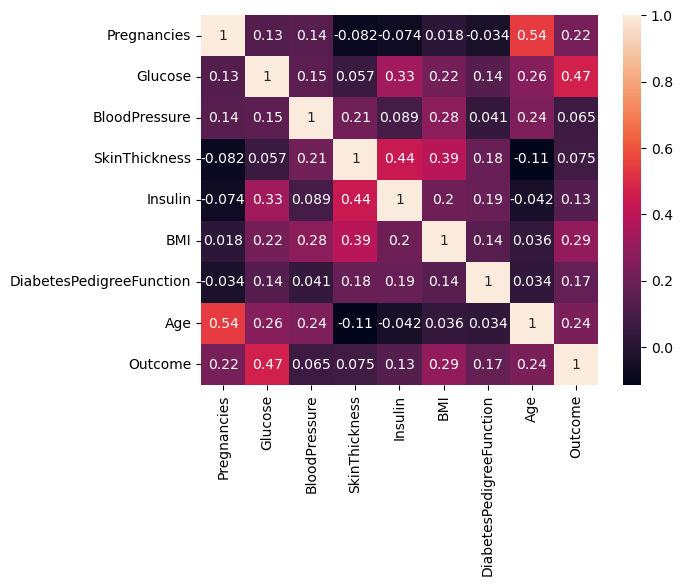

In [9]:
sns.heatmap(df.corr(),annot=True)

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
df["Glucose"]=df["Glucose"].replace(0,df["Glucose"].mean())

In [14]:
df["BloodPressure"]=df["BloodPressure"].replace(0,df["BloodPressure"].mean())

In [15]:
df["SkinThickness"]=df["SkinThickness"].replace(0,df["SkinThickness"].mean())

In [16]:
df["Insulin"]=df["Insulin"].replace(0,df["Insulin"].mean())

In [17]:
df["BMI"]=df["BMI"].replace(0,df["BMI"].mean())

In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [20]:
X=df.iloc[:,:-1]

In [21]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [22]:
y=df["Outcome"]

In [23]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [26]:
X.shape,y.shape

((768, 8), (768,))

In [27]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((514, 8), (254, 8), (514,), (254,))

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
treeclassifier=DecisionTreeClassifier()

In [30]:
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.6194911858974359, 0.9705882352941176, 'x[1] <= 154.5\ngini = 0.457\nsamples = 514\nvalue = [332, 182]'),
 Text(0.35436698717948717, 0.9117647058823529, 'x[7] <= 30.5\ngini = 0.382\nsamples = 432\nvalue = [321, 111]'),
 Text(0.21474358974358973, 0.8529411764705882, 'x[1] <= 127.5\ngini = 0.24\nsamples = 251\nvalue = [216, 35]'),
 Text(0.1282051282051282, 0.7941176470588235, 'x[5] <= 45.45\ngini = 0.153\nsamples = 203\nvalue = [186, 17]'),
 Text(0.11538461538461539, 0.7352941176470589, 'x[0] <= 6.5\ngini = 0.13\nsamples = 200\nvalue = [186, 14]'),
 Text(0.10256410256410256, 0.6764705882352942, 'x[1] <= 104.5\ngini = 0.122\nsamples = 199\nvalue = [186, 13]'),
 Text(0.05128205128205128, 0.6176470588235294, 'x[4] <= 156.0\ngini = 0.037\nsamples = 105\nvalue = [103, 2]'),
 Text(0.02564102564102564, 0.5588235294117647, 'x[3] <= 41.0\ngini = 0.019\nsamples = 102\nvalue = [101, 1]'),
 Text(0.01282051282051282, 0.5, 'gini = 0.0\nsamples = 95\nvalue = [95, 0]'),
 Text(0.038461538461538464

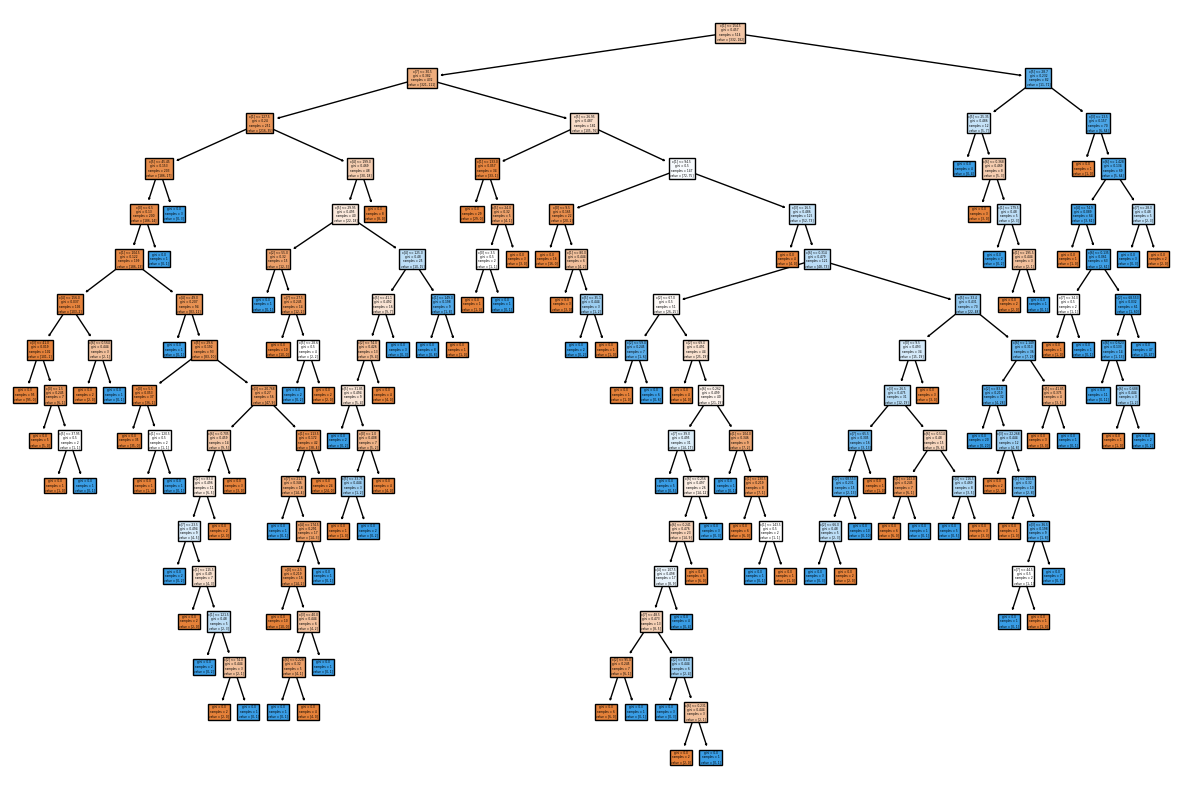

In [31]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [32]:
y_pred=treeclassifier.predict(X_test)

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [33]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [34]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[117  51]
 [ 25  61]]
0.7007874015748031
              precision    recall  f1-score   support

           0       0.82      0.70      0.75       168
           1       0.54      0.71      0.62        86

    accuracy                           0.70       254
   macro avg       0.68      0.70      0.69       254
weighted avg       0.73      0.70      0.71       254



In [35]:
y_pred_proba=treeclassifier.predict_proba(X_test)[::,1]

In [36]:
y_pred_proba

array([1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0.

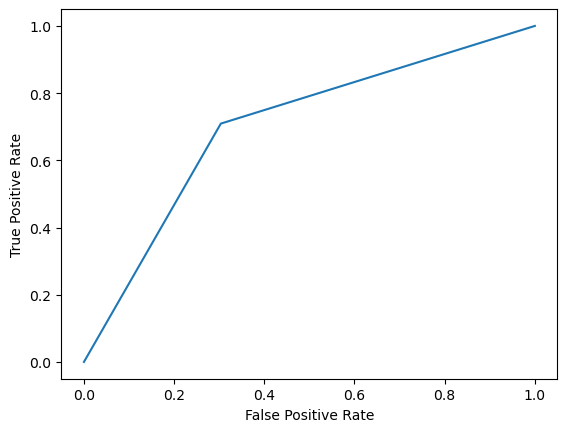

In [37]:
fpr,tpr, _ = metrics.roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
## Preprunning

In [39]:
import warnings
warnings.filterwarnings("ignore")

In [40]:
parameters={
    "criterion":["gini","entropy","log_loss"],
    "splitter":["best","random"],
    "max_depth":[1,2,3,4,5],
    "max_features":["auto","sqrt","log2"]
}

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
clf=GridSearchCV(treeclassifier,param_grid=parameters,cv=5,scoring="accuracy")

In [43]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [44]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [45]:
y_pred=clf.predict(X_test)

In [46]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[155  13]
 [ 58  28]]
0.7204724409448819
              precision    recall  f1-score   support

           0       0.73      0.92      0.81       168
           1       0.68      0.33      0.44        86

    accuracy                           0.72       254
   macro avg       0.71      0.62      0.63       254
weighted avg       0.71      0.72      0.69       254



In [47]:
y_pred_proba=clf.predict_proba(X_test)[::,1]

In [48]:
y_pred_proba

array([0.13043478, 0.47468354, 0.3164557 , 0.02325581, 0.47468354,
       0.47468354, 0.        , 0.47468354, 0.47468354, 0.47468354,
       0.47468354, 1.        , 0.3164557 , 0.        , 0.        ,
       0.3164557 , 0.13043478, 0.        , 1.        , 0.3164557 ,
       0.47468354, 0.        , 0.47468354, 0.13043478, 0.47468354,
       1.        , 0.02325581, 0.        , 0.47468354, 0.13043478,
       1.        , 0.47468354, 1.        , 1.        , 0.47468354,
       0.47468354, 1.        , 0.47468354, 0.47468354, 0.47468354,
       0.        , 0.3164557 , 0.47468354, 0.47468354, 0.        ,
       1.        , 0.47468354, 0.13043478, 0.02325581, 1.        ,
       0.        , 0.47468354, 0.47468354, 0.47468354, 0.02325581,
       0.        , 0.72222222, 0.13043478, 0.47468354, 1.        ,
       0.47468354, 0.47468354, 0.33333333, 0.        , 0.13043478,
       0.47468354, 0.        , 0.47468354, 0.02325581, 1.        ,
       0.3164557 , 0.        , 0.        , 0.        , 0.02325

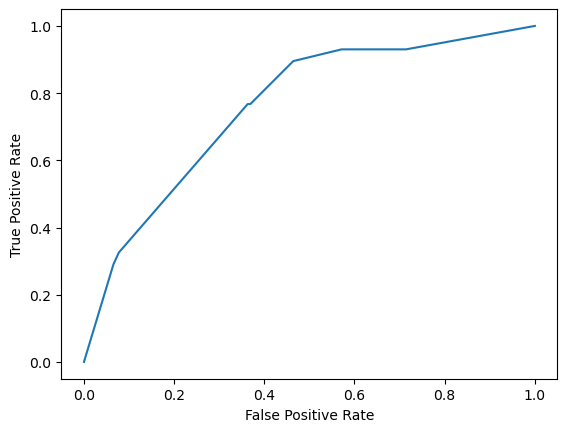

In [49]:
fpr,tpr, _ = metrics.roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

In [50]:
X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.0,79.799479,26.6,0.351,31


[Text(0.6194911858974359, 0.9705882352941176, 'x[1] <= 154.5\ngini = 0.457\nsamples = 514\nvalue = [332, 182]'),
 Text(0.35436698717948717, 0.9117647058823529, 'x[7] <= 30.5\ngini = 0.382\nsamples = 432\nvalue = [321, 111]'),
 Text(0.21474358974358973, 0.8529411764705882, 'x[1] <= 127.5\ngini = 0.24\nsamples = 251\nvalue = [216, 35]'),
 Text(0.1282051282051282, 0.7941176470588235, 'x[5] <= 45.45\ngini = 0.153\nsamples = 203\nvalue = [186, 17]'),
 Text(0.11538461538461539, 0.7352941176470589, 'x[0] <= 6.5\ngini = 0.13\nsamples = 200\nvalue = [186, 14]'),
 Text(0.10256410256410256, 0.6764705882352942, 'x[1] <= 104.5\ngini = 0.122\nsamples = 199\nvalue = [186, 13]'),
 Text(0.05128205128205128, 0.6176470588235294, 'x[4] <= 156.0\ngini = 0.037\nsamples = 105\nvalue = [103, 2]'),
 Text(0.02564102564102564, 0.5588235294117647, 'x[3] <= 41.0\ngini = 0.019\nsamples = 102\nvalue = [101, 1]'),
 Text(0.01282051282051282, 0.5, 'gini = 0.0\nsamples = 95\nvalue = [95, 0]'),
 Text(0.038461538461538464

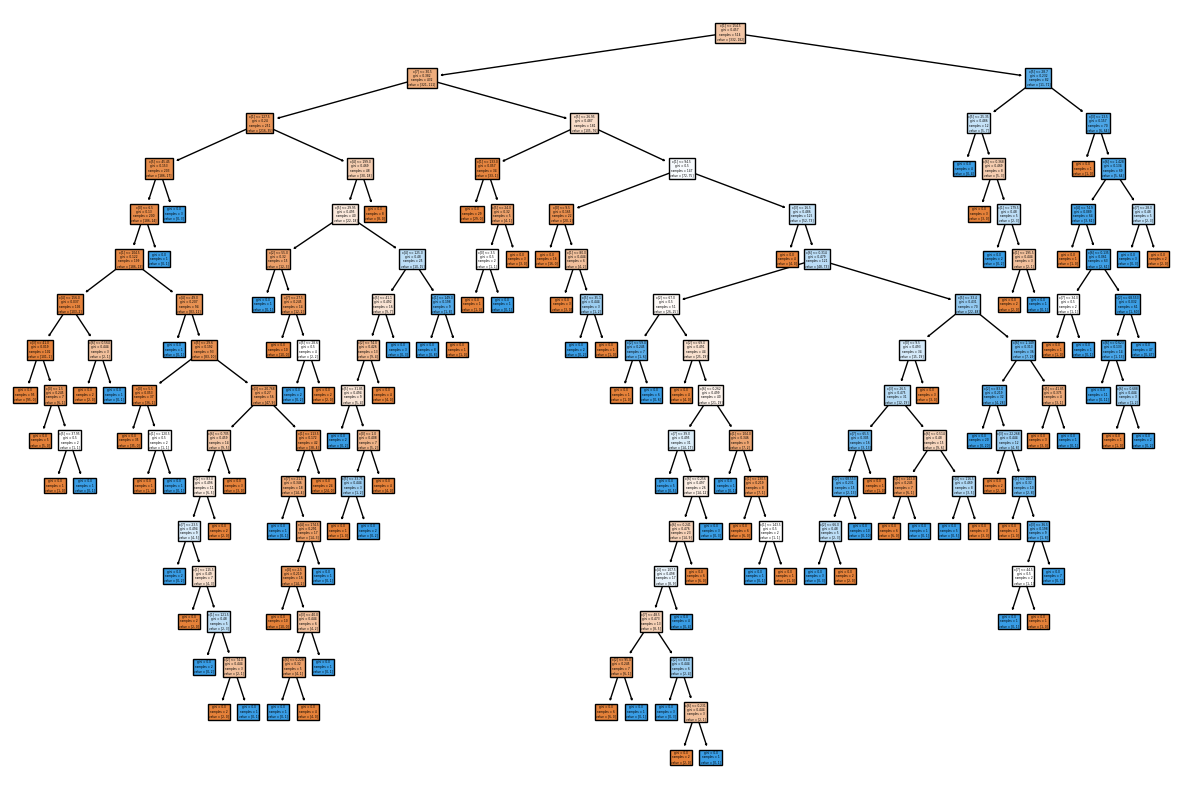

In [57]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [53]:
from sklearn.tree import export_text
tree_rules = export_text(treeclassifier, feature_names=list(X.columns))
print(tree_rules)

|--- Glucose <= 154.50
|   |--- Age <= 30.50
|   |   |--- Glucose <= 127.50
|   |   |   |--- BMI <= 45.45
|   |   |   |   |--- Pregnancies <= 6.50
|   |   |   |   |   |--- Glucose <= 104.50
|   |   |   |   |   |   |--- Insulin <= 156.00
|   |   |   |   |   |   |   |--- SkinThickness <= 41.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- SkinThickness >  41.00
|   |   |   |   |   |   |   |   |--- Pregnancies <= 1.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Pregnancies >  1.50
|   |   |   |   |   |   |   |   |   |--- BMI <= 37.95
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- BMI >  37.95
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Insulin >  156.00
|   |   |   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.56
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- DiabetesPedigreeFunction >  0.56


Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

In [56]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform cross-validation to assess model robustness
scores = cross_val_score(treeclassifier, X, y, cv=10)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = np.mean(scores)
std_dev_score = np.std(scores)

# Print the results
print('Mean accuracy:', mean_score)
print('Standard deviation:', std_dev_score)

Mean accuracy: 0.6889097744360902
Standard deviation: 0.05194756009858174
